In [1]:
%matplotlib inline

import numpy as np
from sklearn.manifold import TSNE
from torch.nn.utils.rnn import pad_sequence

from src.dataset import VietAlphabetDataset, id2label
from src.feature_extractor import wav2vec2
from src.models import fit_model, save_model

dataset = VietAlphabetDataset()

/home/slime/Workspace/Vietnamese-Alphabet-Pronunciation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/slime/Workspace/Vietnamese-Alphabet-Pronunciation/.venv/lib/python3.10/site-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [2]:
feature_vectors = []
labels = []

for waveform, label in dataset:
    feat = wav2vec2(waveform)

    feature_vectors.append(feat)
    labels.append(label)

feature_vectors = pad_sequence(feature_vectors, batch_first=True).numpy()
labels = np.asarray(labels)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5])

In [3]:
feature_vectors.shape, labels.shape

((141, 86), (141,))

In [4]:
model = fit_model(feature_vectors, labels)
save_model(model)

Iteration 1, loss = 2.12676048
Iteration 2, loss = 2.12635136
Iteration 3, loss = 2.12577510
Iteration 4, loss = 2.12505412
Iteration 5, loss = 2.12420917
Iteration 6, loss = 2.12332129
Iteration 7, loss = 2.12238693
Iteration 8, loss = 2.12133646
Iteration 9, loss = 2.12021279
Iteration 10, loss = 2.11907005
Iteration 11, loss = 2.11792207
Iteration 12, loss = 2.11675930
Iteration 13, loss = 2.11559319
Iteration 14, loss = 2.11443567
Iteration 15, loss = 2.11328745
Iteration 16, loss = 2.11215115
Iteration 17, loss = 2.11103344
Iteration 18, loss = 2.10993648
Iteration 19, loss = 2.10886407
Iteration 20, loss = 2.10781717
Iteration 21, loss = 2.10679579
Iteration 22, loss = 2.10580111
Iteration 23, loss = 2.10483193
Iteration 24, loss = 2.10389066
Iteration 25, loss = 2.10297585
Iteration 26, loss = 2.10208583
Iteration 27, loss = 2.10123873
Iteration 28, loss = 2.10044050
Iteration 29, loss = 2.09971404
Iteration 30, loss = 2.09901619
Iteration 31, loss = 2.09831381
Iteration 32, los

/home/slime/Workspace/Vietnamese-Alphabet-Pronunciation/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


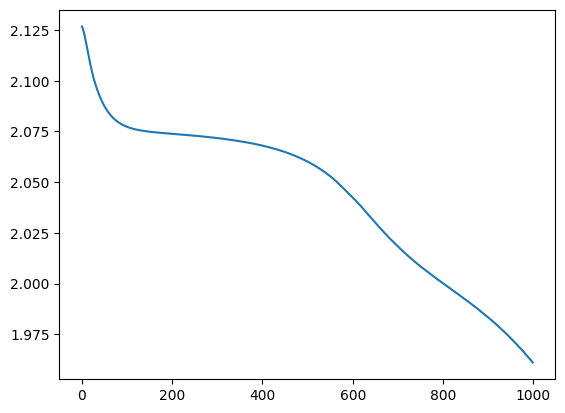

In [5]:
plt.plot(model.loss_curve_)

In [6]:
idx = 10
label = id2label(labels[idx])
proba = model.predict_proba(np.expand_dims(feature_vectors[idx], 0))
proba[:, labels[idx]]

array([0.13750699], dtype=float32)

In [7]:
labels[idx], model.predict_proba(np.expand_dims(feature_vectors[idx], 0))


(
    np.int64(0),
    array([[0.13750699, 0.14352863, 0.16309036, 0.07813117, 0.08005571,
        0.13545252, 0.14164065, 0.12059403]], dtype=float32)
)

In [7]:
model = TSNE(
    n_components=2,
    verbose=2,
).fit_transform(np.asarray(feature_vectors))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 141 samples in 0.000s...
[t-SNE] Computed neighbors for 141 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 1.872073
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 46.7683372, gradient norm = 0.3864654 (50 iterations in 0.026s)
[t-SNE] Iteration 100: error = 46.5584602, gradient norm = 0.3027618 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 46.5196457, gradient norm = 0.3674369 (50 iterations in 0.021s)
[t-SNE] Iteration 200: error = 47.1398926, gradient norm = 0.3375542 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 47.5185127, gradient norm = 0.2950214 (50 iterations in 0.017s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.518513
[t-SNE] Iteration 300: error = 0.0832369, gradient norm = 0.0021899 (50 iterations in 0.015s)
[t-SNE] Iteration 350: error = 0.0720903, gradient norm = 0.0033564 (

In [8]:
import plotly.express as px

fig = px.scatter(model, x=0, y=1, color=labels)
fig.show()

In [13]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
sum([0.15930423, 0.1652451 , 0.17497283, 0.0614966 , 0.05916306,
        0.11112186, 0.1471671 , 0.12152921])

0.9999999900000001